# t-Tests

***

In [1]:
# Plots.
import matplotlib.pyplot as plt

# Numerical arrays.
import numpy as np

## Normal Distribution

***

**Probability Density Function**

$ f(x) = \frac{1}{\sigma \sqrt{2 \pi} } e^{- \frac{1}{2} \big(\frac{x - \mu}{\sigma}\big)^2 } $

In [2]:
def normal_pdf(x, mu=0.0, sigma=1.0):
  # Answer: A*B.
  A = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
  B = np.exp(-0.5 * ((x - mu) / sigma)**2)
  return A * B

**Standard Normal**

$\mu = 0$ and $\sigma = 1$

$ f(x) = \frac{1}{\sqrt{2 \pi} } e^{- \frac{1}{2} x^2 } $

In [3]:
# Middle of the standard normal pdf.
normal_pdf(0.0)

0.3989422804014327

In [4]:
# https://en.wikipedia.org/wiki/Normal_distribution
# Blue line.
normal_pdf(0.0, mu=0.0, sigma=np.sqrt(0.2))

0.8920620580763857

In [5]:
# https://en.wikipedia.org/wiki/Normal_distribution
# Green line.
normal_pdf(0.0, mu=-2.0, sigma=np.sqrt(0.5))

0.010333492677046035

## Plots

***

![Normal PDF](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/640px-Normal_Distribution_PDF.svg.png)

https://en.wikipedia.org/wiki/Normal_distribution

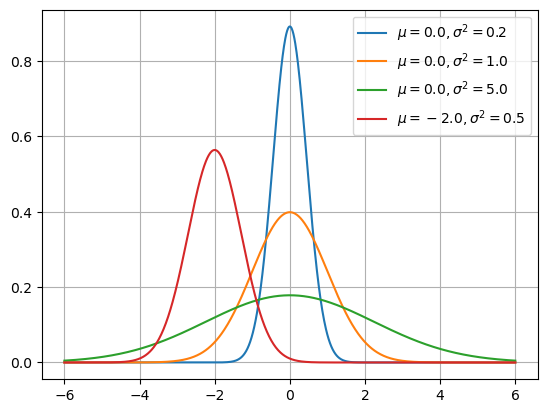

In [6]:
# Create a blank plot.
fig, ax = plt.subplots()

# Range of x values.
x = np.linspace(-6.0, 6.0, 1001)

# Plot various values for pdf.
for mu, sigma2 in [[0.0, 0.2], [0.0, 1.0], [0.0, 5.0], [-2.0, 0.5]]:
  y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
  ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')

# Add a legend.
ax.legend()

# Add a grid.
ax.grid()

## Area Under the Curve

***

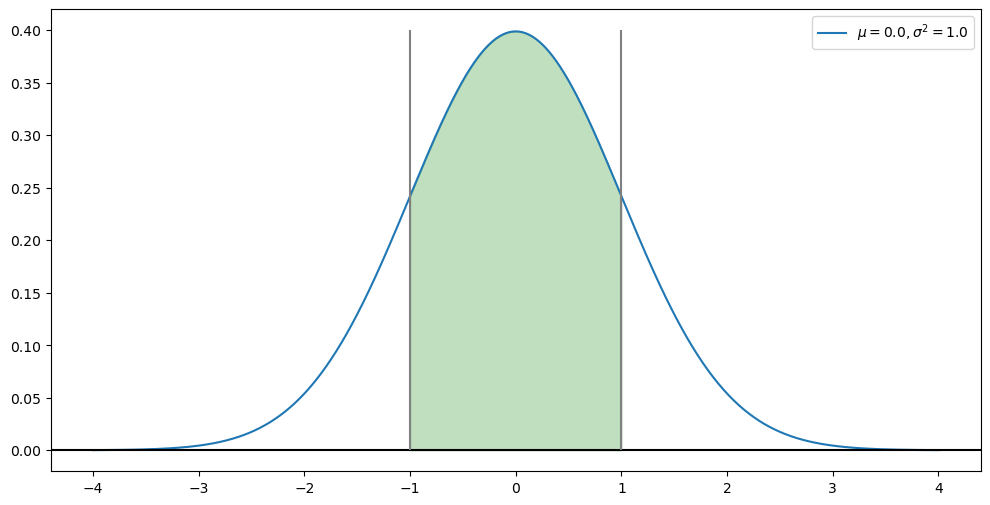

In [7]:
# Create a blank plot.
fig, ax = plt.subplots(figsize=(12,6))

# Range of x values.
x = np.linspace(-4.0, 4.0, 1001)

# Plot the pdf for the standard normal distribution.
mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$')

# Add an x axis.
ax.axhline(0.0, color='black')

# Add vertical lines.
ax.vlines([-1.0, 1.0], 0.0, 0.4, color="grey")

# x values between the vertical lines.
x_interval = np.linspace(-1.0, 1.0, 101)

# Shade the area under the blue curve between the vertical lines.
ax.fill_between(x_interval, normal_pdf(x_interval), color='green', alpha=0.25)

# Add a legend.
ax.legend();

In [8]:
# The intersection of the grey and blue lines.
print(f'(-1.0, {normal_pdf(-1.0)})')
print(f'( 1.0, {normal_pdf(1.0)})')

(-1.0, 0.24197072451914337)
( 1.0, 0.24197072451914337)


## Normal Data

***

In [9]:
# Generate some random normal data.
random_data = np.random.standard_normal(100000)

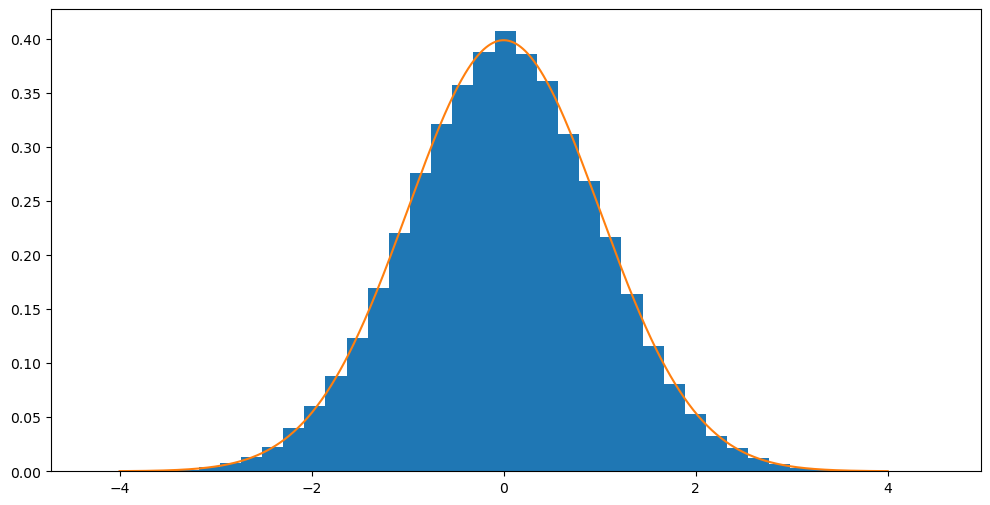

In [10]:
# Create an empty plot.
fig, ax = plt.subplots(figsize=(12,6))

# Plot a histogram of the data.
ax.hist(random_data, bins=40, density=True)

# Plot the pdf for the standard normal distribution.
mu, sigma2 = 0.0, 1.0
y = normal_pdf(x, mu=mu, sigma=np.sqrt(sigma2))
ax.plot(x, y, label=f'$\mu = {mu}, \sigma^2 = {sigma2}$');



## Sampling Distribution

***

In [11]:
# Generate some random normal data.
random_data = np.random.standard_normal((10000,20))

# Show.
random_data

array([[-1.12989667e+00, -6.28964378e-01, -5.14893080e-01, ...,
        -2.59531769e-01, -1.15006751e+00, -1.34314987e+00],
       [ 1.54310066e+00, -1.24158645e+00, -6.45131655e-02, ...,
         2.18198603e-01,  4.45762228e-01,  4.13022993e-01],
       [ 1.64756582e+00, -1.11962578e+00,  1.21541342e+00, ...,
         2.48289799e-01, -9.77846328e-01,  4.32097903e-01],
       ...,
       [ 4.98708706e-01,  1.97889887e+00, -2.28738170e-03, ...,
         1.10966112e+00, -1.63174884e-02, -9.91561505e-01],
       [ 2.45769900e-01,  5.35050663e-01,  5.99797437e-01, ...,
        -5.94695339e-01,  2.70138375e+00,  2.07279595e-01],
       [ 1.18171295e+00,  6.32399178e-01,  4.54551958e-01, ...,
        -1.71855033e+00,  1.07351187e+00, -2.98752969e-02]])

In [12]:
# Mean across the rows.
random_data.mean(axis=1)

array([-0.32056343,  0.13726676,  0.05178784, ...,  0.14242106,
        0.12256971,  0.2726072 ])

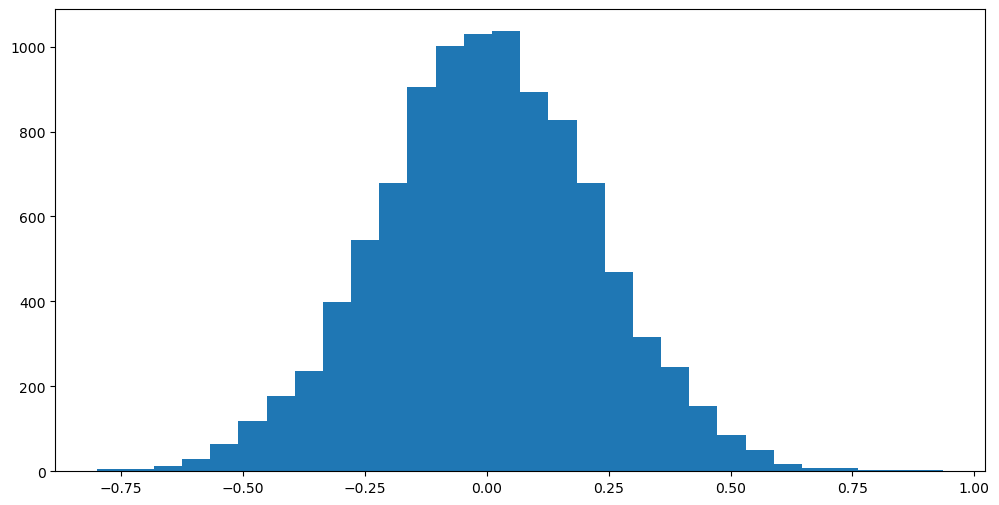

In [13]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30);

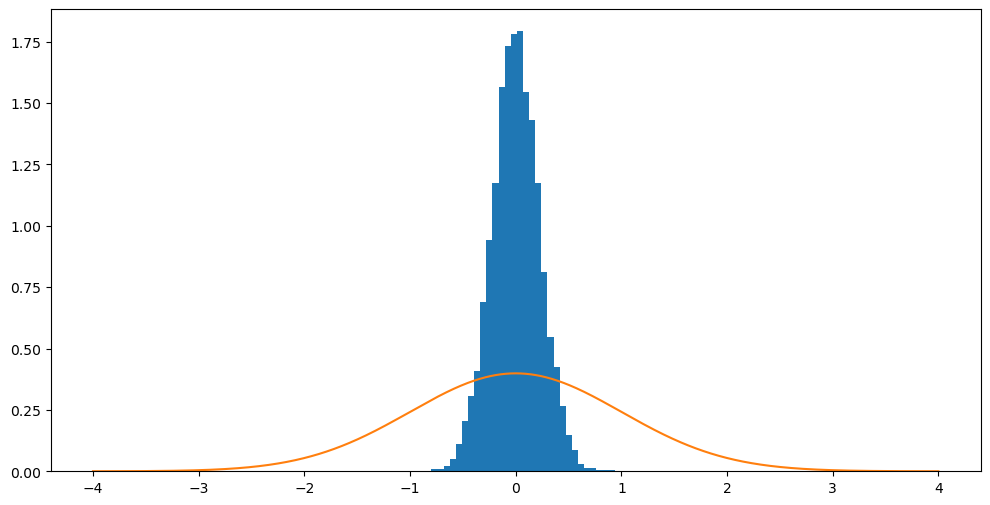

In [14]:
# Create an empty figure.
fig, ax = plt.subplots(figsize=(12,6))

# Histogram of means.
ax.hist(random_data.mean(axis=1), bins=30, density=True)

# Plot standard normal distribution.
y = normal_pdf(x)
ax.plot(x, y);

***

## End